<a href="https://colab.research.google.com/github/LokeshwariMagendran/githubNM/blob/main/airquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving air_quality.csv to air_quality (3).csv
Data Shape after Cleaning: (9471, 16)
Missing Values after Cleaning:
 Date             9471
Time             9471
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
,,,,,            9471
dtype: int64

Data Description:
        Date  Time       CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  \
count   0.0   0.0  9471.000000  9471.000000  9471.000000  9471.000000   
mean    NaN   NaN   -34.207524  1048.990061  -159.090093     1.865683   
std     NaN   NaN    77.188336   327.841433   138.945154    41.130385   
min     NaN   NaN  -200.000000  -200.000000  -200.000000  -200.000000   
25%     NaN   NaN     0.600000   923.000000  -200.000000     3.900000   
50%     NaN   NaN     1.500000  1050.000000  -200.000000     

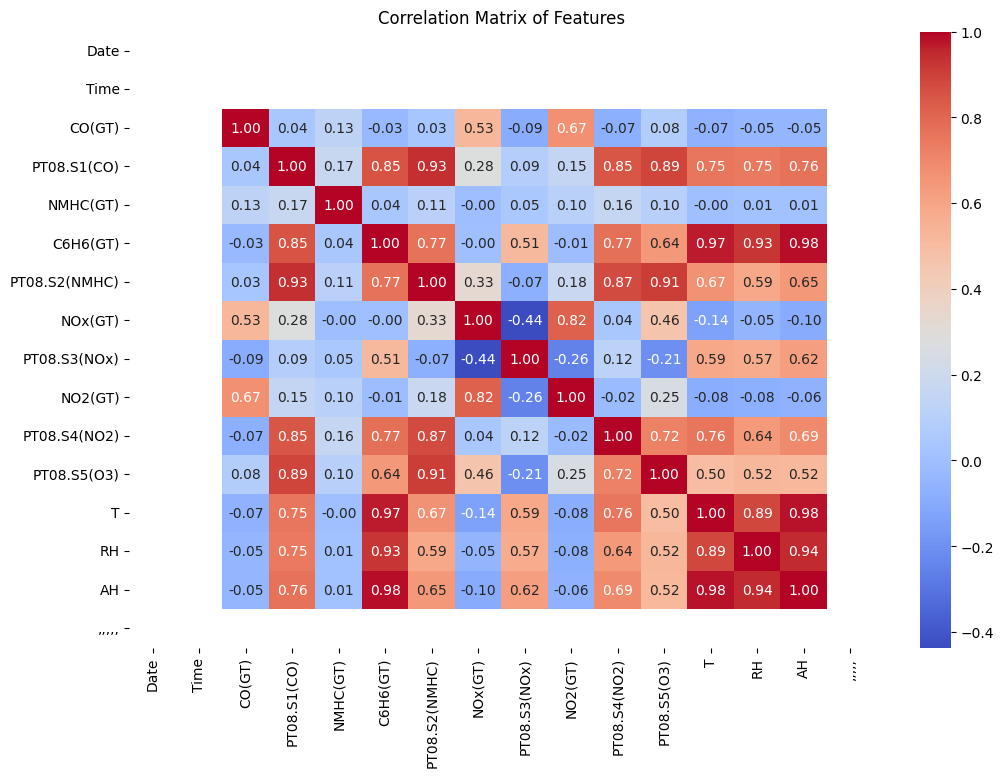


Missing values in df_numeric:
Date             9471
Time             9471
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
,,,,,            9471
dtype: int64

Shape of df_numeric: (9471, 16)

Shape of df_numeric after filling NaNs: (9471, 16)

Scaled Data Shape: (9471, 16)

PCA Transformed Data Shape: (9471, 5)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# 1. Data Loading and Cleaning
from google.colab import files
uploaded = files.upload()  # Upload the 'air_quality.csv' file

# Load the dataset (assuming the file is uploaded successfully)
df = pd.read_csv('air_quality.csv', delimiter=';')

# Drop unnamed columns if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Replace commas with dots and convert columns to numeric
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaN values with column means
df.fillna(df.mean(numeric_only=True), inplace=True)

# Display a summary of the data
print("Data Shape after Cleaning:", df.shape)
print("Missing Values after Cleaning:\n", df.isnull().sum())

# Perform basic EDA (Exploratory Data Analysis)
print("\nData Description:\n", df.describe())

# Visualize correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# 2. Feature Engineering
# Creating new features based on existing ones (e.g., PM Ratio, Temperature-Humidity Interaction)
if "PM2.5" in df.columns and "PM10" in df.columns:
    df["PM_Ratio"] = df["PM2.5"] / df["PM10"]

if "Temperature" in df.columns and "RH" in df.columns:
    df["Humidity_Temp_Interaction"] = df["RH"] * df["Temperature"]

# Extract only numeric features for further analysis
df_numeric = df.select_dtypes(include=np.number)

# Check if df_numeric has any missing values
print(f"\nMissing values in df_numeric:\n{df_numeric.isnull().sum()}")

# Check the shape of df_numeric to make sure it's not empty
print(f"\nShape of df_numeric: {df_numeric.shape}")

# Instead of dropping rows, fill NaN with 0
# df_numeric.dropna(inplace=True)  # Comment out or remove this line
df_numeric.fillna(0, inplace=True)  # Fill NaN with 0 instead of dropping

# Verify that we still have data in df_numeric
print(f"\nShape of df_numeric after filling NaNs: {df_numeric.shape}")

# 3. Ensure all columns are numeric before scaling
if df_numeric.shape[1] > 0:
    # Scale the features for machine learning models
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numeric)
    print(f"\nScaled Data Shape: {df_scaled.shape}")
else:
    print("\nNo valid numeric data available for scaling.")

# Apply PCA (Principal Component Analysis) to reduce dimensionality (optional, depends on your data)
if df_scaled.size > 0:  # Ensure that scaling was successful
    pca = PCA(n_components=5)  # Reduce to 5 principal components
    df_pca = pca.fit_transform(df_scaled)
    print(f"\nPCA Transformed Data Shape: {df_pca.shape}")
else:
    print("PCA cannot be performed as no valid scaled data exists.")